In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import os
from IPython.display import display, HTML

ModuleNotFoundError: No module named 'folium'

In [3]:
pip install folium

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import os
from IPython.display import display, HTML

In [7]:
sns.set(style="whitegrid")

In [9]:
df = pd.read_csv(r"C:\Users\Aneesh\Downloads\cleaned_aggregated_data.xls")

In [19]:
df = pd.read_csv(r"C:\Users\Aneesh\Downloads\Cleaned Data.csv")

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state_name     3309 non-null   object
 1   district_name  3309 non-null   object
 2   disability     3309 non-null   object
 3   age_group      3309 non-null   object
 4   male           3309 non-null   int64 
 5   female         3309 non-null   int64 
 6   other          3309 non-null   int64 
 7   total          3309 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 206.9+ KB
None


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import io

In [35]:
df = pd.read_csv(r"C:\Users\Aneesh\Downloads\Cleaned Data.csv")

In [37]:
total_registrations = df['total'].sum()
print(f"Total Registrations: {total_registrations}")

Total Registrations: 869244


In [39]:
unique_districts = df['district_name'].nunique()
unique_disabilities = df['disability'].nunique()
print(f"Unique Districts: {unique_districts}")
print(f"Unique Disabilities: {unique_disabilities}")

Unique Districts: 31
Unique Disabilities: 21


In [41]:
district_registrations = df.groupby('district_name')['total'].sum().sort_values(ascending=False)
print("District-wise Registrations:\n", district_registrations)

District-wise Registrations:
 district_name
Belagavi            86288
Tumakuru            48246
Bengaluru Urban     47979
Haveri              36952
Mysuru              35771
Vijayapura          35551
Kalaburagi          34502
Chitradurga         33342
Ballari             31888
Bagalkote           31720
Dharwad             31123
Raichur             29457
Yadgir              28464
Davangere           28252
Hassan              27726
Mandya              27510
Dakshina Kannada    23607
Koppal              22945
Bidar               22572
Chikkaballapura     21786
Uttara Kannada      21686
Kolar               21436
Shivamogga          20992
Gadag               20640
Chamarajanagara     18352
Chikkamagaluru      17071
Udupi               16068
Bengaluru Rural     15850
Ramanagara          15754
Vijayanagar          8698
Kodagu               7016
Name: total, dtype: int64


In [43]:
gender_dist = df[['male', 'female', 'other']].sum()
print("Gender Distribution:\n", gender_dist)

Gender Distribution:
 male      555911
female    313182
other        151
dtype: int64


In [45]:
age_dist = df.groupby('age_group')['total'].sum()
print("Age-wise Distribution:\n", age_dist)

Age-wise Distribution:
 age_group
0-6         7721
15-35     250752
35-60     410560
60-80     110018
80+         7510
Jun-15     82683
Name: total, dtype: int64


In [47]:
disability_dist = df.groupby('disability')['total'].sum().sort_values(ascending=False)
print("Disability-wise Registrations:\n", disability_dist)

Disability-wise Registrations:
 disability
Locomotor Disability               433714
Intellectual Disability            105454
Hearing Impairment                  99667
Blindness                           80112
Mental Illness                      43914
Low Vision                          34289
Multiple Disabilities               24911
Cerebral Palsy                      13420
Chronic Neurological Conditions     13085
Speech And Language Disability       5796
Muscular Dystrophy                   3230
Dwarfism                             3117
Autism Spectrum Disorder             1995
Leprosy Cured                        1459
Hemophilia                           1355
Thalassemia                          1314
Multiple Sclerosis                    727
Parkinson'S Disease                   680
Acid Attack Victim                    503
Specific Learning Disabilities        337
Sickle Cell Disease                   165
Name: total, dtype: int64


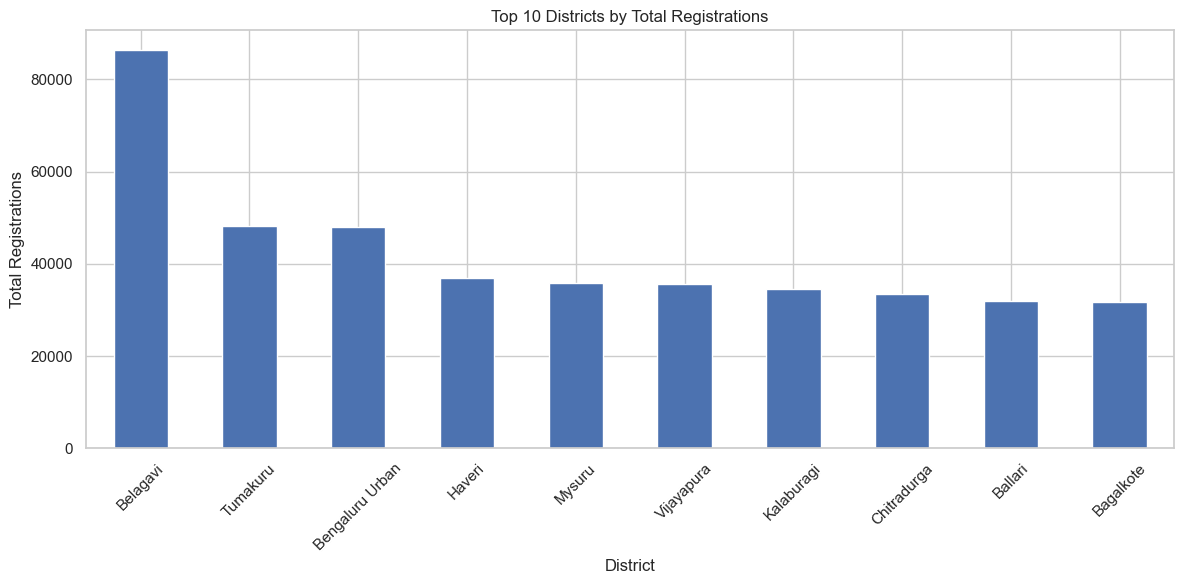

In [49]:
plt.figure(figsize=(12, 6))
district_registrations.head(10).plot(kind='bar')
plt.title('Top 10 Districts by Total Registrations')
plt.xlabel('District')
plt.ylabel('Total Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('district_registrations.png')
plt.show()

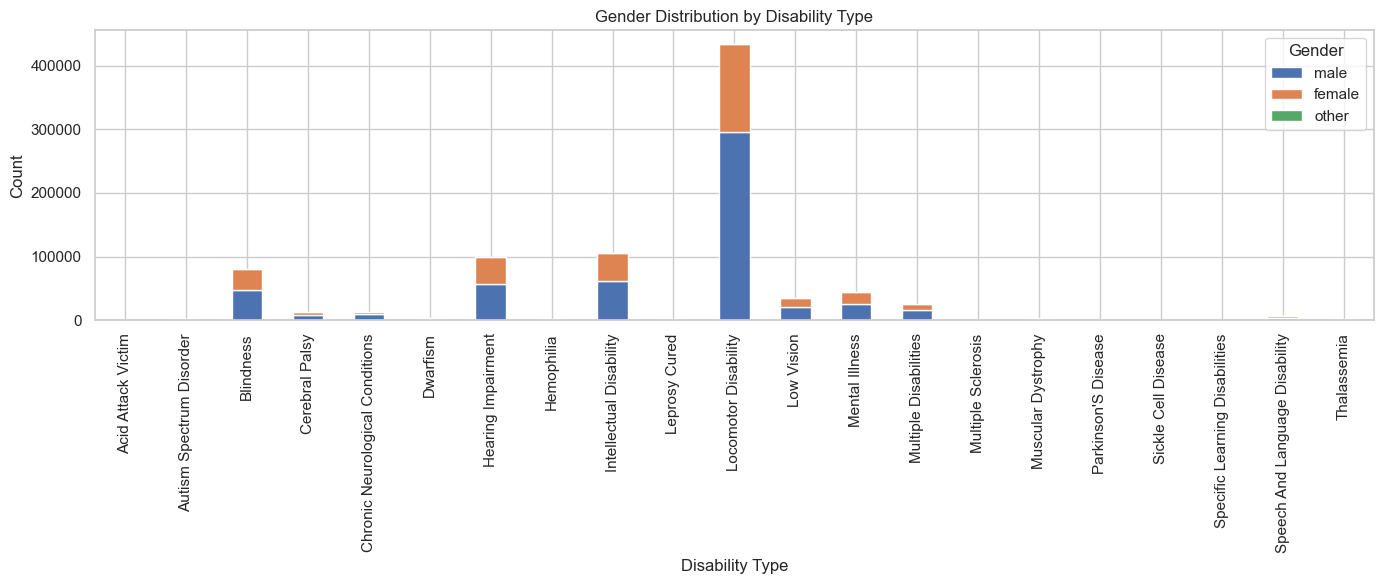

In [51]:
gender_by_disability = df.groupby('disability')[['male', 'female', 'other']].sum()
gender_by_disability.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Gender Distribution by Disability Type')
plt.xlabel('Disability Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('gender_distribution.png')
plt.show()

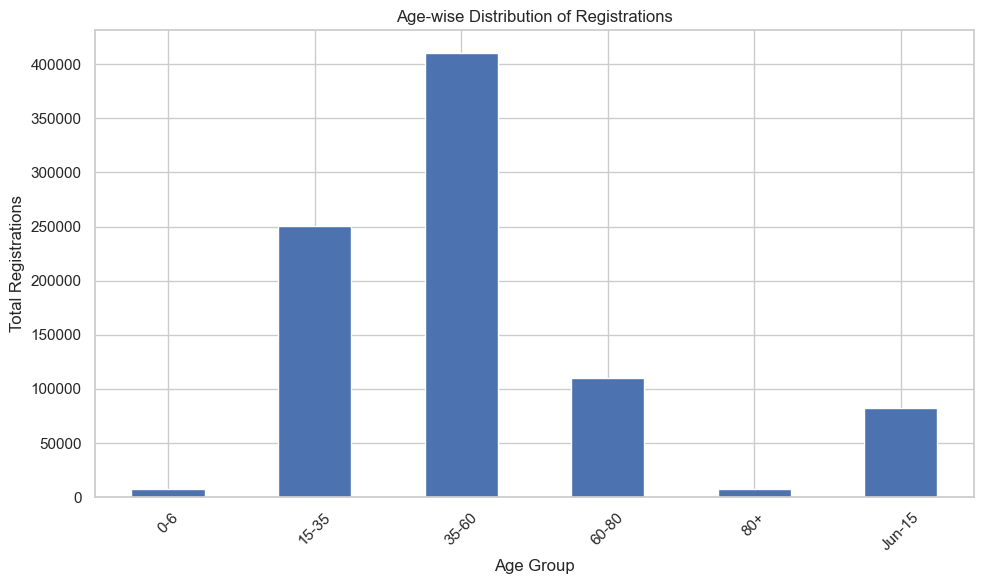

In [53]:
plt.figure(figsize=(10, 6))
age_dist.plot(kind='bar')
plt.title('Age-wise Distribution of Registrations')
plt.xlabel('Age Group')
plt.ylabel('Total Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

In [55]:
district_coords = {
    'Bagalkote': [16.1850, 75.6950],
    'Ballari': [15.1394, 76.9214],
    'Belagavi': [15.8497, 74.4977],
    'Bengaluru Rural': [13.2257, 77.5750]
}

In [57]:
district_data = df.groupby('district_name')['total'].sum().reset_index()
district_data['latitude'] = district_data['district_name'].map(lambda x: district_coords.get(x, [0, 0])[0])
district_data['longitude'] = district_data['district_name'].map(lambda x: district_coords.get(x, [0, 0])[1])


In [59]:
m = folium.Map(location=[15.3173, 75.7139], zoom_start=7)

In [61]:
heat_data = [[row['latitude'], row['longitude'], row['total']] for _, row in district_data.iterrows() if row['latitude'] != 0]

In [63]:
HeatMap(heat_data, radius=15).add_to(m)

In [65]:
m.save('district_heatmap.html')
print("Interactive map saved as 'district_heatmap.html'")

Interactive map saved as 'district_heatmap.html'
